<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/costa_rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.71


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=85115389468f94dc607c05d5e1f65826&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYa0VmU0kwcXM3b3hWN0JEejU0MFhBWU5GRE9YaWp1VXlYRklpQ01RU3NBcm5uekFkd05WV2VXalNjb0paZUkwZyIsInN0YXRlIjoiODUxMTUzODk0NjhmOTRkYzYwN2MwNWQ1ZTFmNjU4MjYifQ==


In [32]:
# https://drive.google.com/file/d/1-D9BBE85uUd1GY3gNfy73qiudsAccnjT/view?usp=drive_link
drive_download(file = as_id('1-D9BBE85uUd1GY3gNfy73qiudsAccnjT'), path =  '/content/limon_22_23.tif', overwrite = TRUE)
limon_22_23_tif <- stack('/content/limon_22_23.tif')

In [70]:
# https://drive.google.com/file/d/1-0NUijQ91Q6dWf_mb0weeNH1KhtCU9Hk/view?usp=drive_link
drive_download(file = as_id('1-D9BBE85uUd1GY3gNfy73qiudsAccnjT'), path =  '/content/limon_15_16.tif', overwrite = TRUE)
limon_15_16_tif <- stack('/content/limon_15_16.tif')

File downloaded:

• Limon_22_23.tif <id: 1-D9BBE85uUd1GY3gNfy73qiudsAccnjT>

Saved locally as:

• /content/limon_15_16.tif



In [62]:
# https://drive.google.com/file/d/1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7/view?usp=sharing
# drive_download(file = as_id('1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7'), path =  '/content/limon.gpkg', overwrite = FALSE)
limon_gpgk <- st_read('/content/limon.gpkg') %>% st_transform(st_crs(limon_22_23_tif))

Reading layer `limon' from data source `/content/limon.gpkg' using driver `GPKG'
Simple feature collection with 1 feature and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -83.94696 ymin: 9.07481 xmax: -82.55271 ymax: 10.93904
Geodetic CRS:  WGS 84


In [63]:
# https://drive.google.com/file/d/1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db/view?usp=drive_link
# drive_download(file = as_id('1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db'), path =  '/content/park.gpkg', overwrite = FALSE)
park_gpgk <- st_read('/content/park.gpkg') %>% st_transform(st_crs(limon_22_23_tif))

Reading layer `park' from data source `/content/park.gpkg' using driver `GPKG'
Simple feature collection with 2 features and 0 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -83.39799 ymin: 10.07181 xmax: -83.15862 ymax: 10.35479
Geodetic CRS:  WGS 84


In [64]:
park_gpgk$names <- c('region','main')

In [71]:
raster_list <- list(
  limon_15_16_tif,
  limon_22_23_tif)

In [72]:
names(raster_list) <- c('y2015','y2022')

In [73]:
ndvi_rast <-raster_list[[1]] %>% rast

ndvi_dt <- exact_extract(ndvi_rast,park_gpgk,fun='mean')

  |======================================================================| 100%


In [77]:
limon_15_16_tif[[1]]

class      : RasterLayer 
band       : 1  (of  10  bands)
dimensions : 20753, 15522, 322128066  (nrow, ncol, ncell)
resolution : 8.983153e-05, 8.983153e-05  (x, y)
extent     : -83.94702, -82.55266, 9.074781, 10.93905  (xmin, xmax, ymin, ymax)
crs        : +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs 
source     : limon_15_16.tif 
names      : limon_15_16_1 


In [48]:
ndvi_mean_dt <-
raster_list %>%
  names %>%
  lapply(function(ndvi_names){


ndvi_rast <-raster_list[[ndvi_names]] %>% rast

ndvi_dt <- exact_extract(ndvi_rast,park_gpgk,fun='mean')
# ndvi_dt$names
ndvi_table <-
ndvi_dt %>%
  names %>%
  lapply(function(x){
    data.table(column = x,NDVI_mean = ndvi_dt[[x]],Name = park_gpgk$names)
  }) %>%
rbindlist()

ndvi_dt <- exact_extract(ndvi_rast,park_gpgk,fun='stdev')
# ndvi_dt$names
ndvi_sd_table <-
ndvi_dt %>%
  names %>%
  lapply(function(x){
    data.table(column = x,NDVI_sd = ndvi_dt[[x]],Name = park_gpgk$names)
  }) %>%
rbindlist()

ndvi_table$month <- ndvi_names
ndvi_table$NDVI_sd <- ndvi_sd_table$NDVI_sd
return(ndvi_table)
  }) %>%
    rbindlist()

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [23]:
ndvi_mean_dt[,year:=column %>% strsplit(.,'_') %>% lapply(function(x){x[[2]]}) %>% lapply(as.numeric)]
ndvi_mean_dt[,month:=month %>% factor(., levels= c('January','February','March','April','June','July','August','September', 'October','November','December'))]
ndvi_mean_dt[,month_i:=(month %>% as.numeric)]

In [24]:
ndvi_mean_dt[,year_introduced := 0]
ndvi_mean_dt[Name=='Shoshone Tribe',year_introduced := 2015]
ndvi_mean_dt[Name== 'Buffalo Initiative',year_introduced := 2018]
ndvi_mean_dt[Name== 'T3000, Unassigned Leases',year_introduced := 2018]
ndvi_mean_dt[Name== 'Buffalo Initiative',year_introduced := 2020]

In [25]:
# ndvi_mean_dt %>% head

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 53 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 45 rows containing missing values (`geom_line()`).”


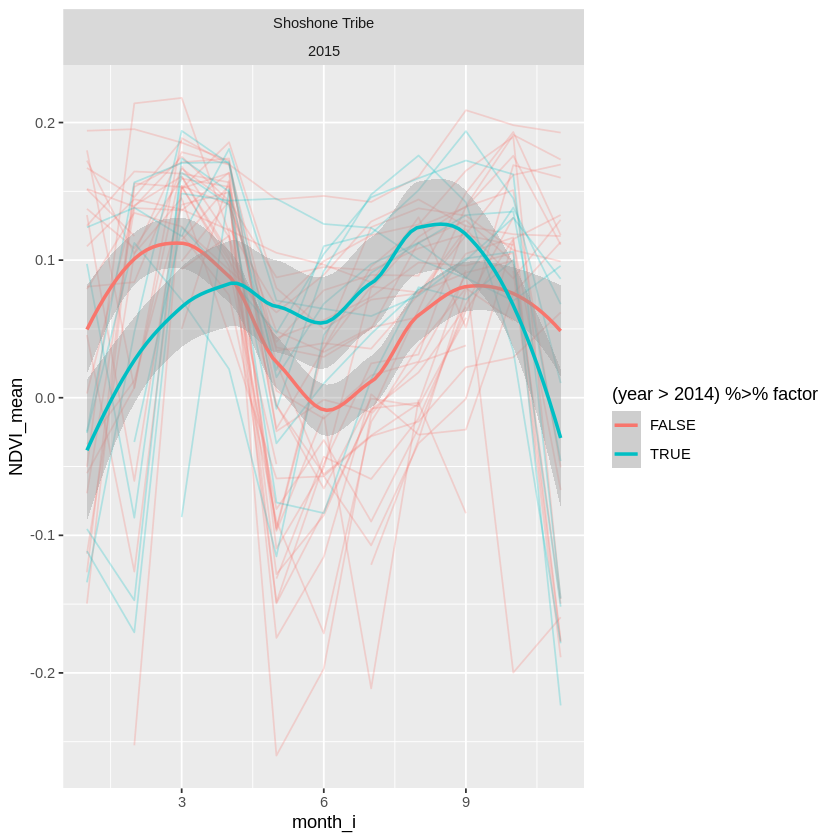

In [26]:
# Name=='Shoshone Tribe'
ndvi_mean_dt[Name=='Shoshone Tribe'] %>%
  ggplot(aes(x=month_i ,y=NDVI_mean))+
  geom_line(aes(group=year %>% paste,color=(year > 2014) %>% factor  ),alpha = 0.25 ) +
  # xlim(3,10)+
  geom_smooth(aes(color=(year > 2014) %>% factor ))+
  facet_wrap(Name~year_introduced)

In [27]:
ndvi_mean_dt <- ndvi_mean_dt[order(month_i)]
ndvi_mean_dt[,accum_ndvi :=NULL]
ndvi_mean_dt[month_i>0 &month_i<13,  accum_ndvi := cumsum(NDVI_mean), by= .(Name,year %>% paste)]
# ndvi_mean_dt[,list(accum_ndvi=mean(accum_ndvi,na.rm=T)),by = .(month,year %>% paste,Name)][!is.na(accum_ndvi)]

Warning message in `[.data.table`(ndvi_mean_dt, , `:=`(accum_ndvi, NULL)):
“Column 'accum_ndvi' does not exist to remove”


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 180 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 180 rows containing missing values (`geom_line()`).”


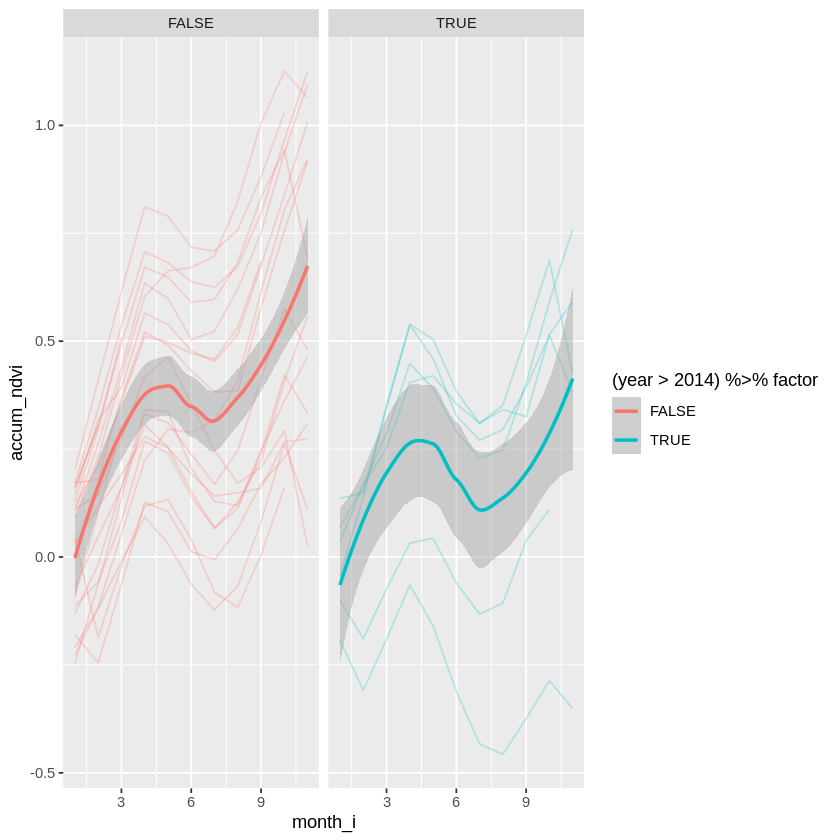

In [28]:
ndvi_mean_dt[ Name=='Wickstram Property' ] %>%
  ggplot(aes(x=month_i,y=accum_ndvi))+
  geom_line(aes(group=year %>% paste,color=(year > 2014) %>% factor ),alpha = 0.25) +
  geom_smooth(aes( color=(year > 2014) %>% factor ))+
  facet_wrap( ~year > 2014)